# Parameter Tuning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [8]:
xgb_df = pd.read_pickle("xgb_gridcv_4.pkl")
lgbm_df = pd.read_pickle("lgbm_gridcv_4.pkl")

In [17]:
xgb_df.sort_values('mean_test_score',ascending=False)
xgb_df.iloc[12]

mean_fit_time                                                    908.998
mean_score_time                                                 0.780687
mean_test_score                                               -0.0529571
mean_train_score                                              -0.0502095
param_base_score                                              0.00762755
param_learning_rate                                                 0.03
param_max_depth                                                        6
param_n_estimators                                                   235
param_objective                                               reg:linear
param_reg_alpha                                                      0.2
param_reg_lambda                                                     0.8
param_silent                                                        True
param_subsample                                                      0.6
params                 {u'reg_alpha': 0.2, u'silent

In [26]:
df = xgb_df[['mean_test_score','param_learning_rate','param_max_depth','param_reg_alpha','param_reg_lambda','param_subsample']]
df_norm = (df - df.min()) / (df.max() - df.min())

In [27]:
df_norm.head()

,mean_test_score,param_learning_rate,param_max_depth,param_reg_alpha,param_reg_lambda,param_subsample
0,0.993616,0,0,0,0,0
1,0.993180,0,0,0,0,1
2,0.994852,0,0,0,1,0
3,0.994346,0,0,0,1,1
4,0.998017,0,0,0.5,0,0


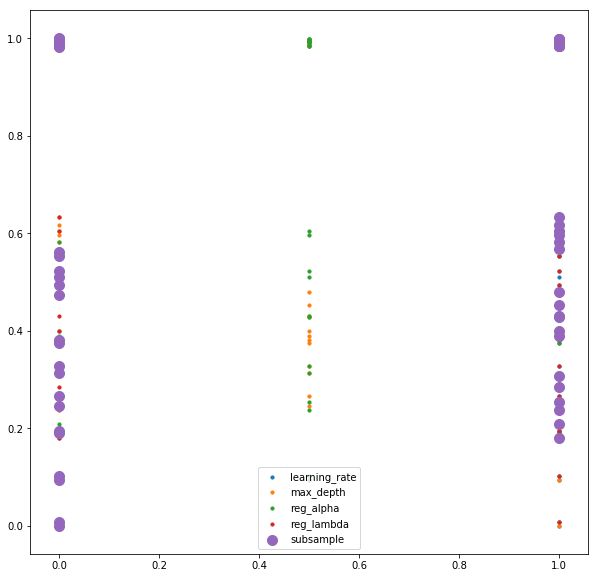

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(df_norm['param_learning_rate'].values,df_norm['mean_test_score'].values,label='learning_rate',s=10)
plt.scatter(df_norm['param_max_depth'].values,df_norm['mean_test_score'].values,label='max_depth',s=10)
plt.scatter(df_norm['param_reg_alpha'].values,df_norm['mean_test_score'].values,label='reg_alpha',s=10)
plt.scatter(df_norm['param_reg_lambda'].values,df_norm['mean_test_score'].values,label='reg_lambda',s=10)
plt.scatter(df_norm['param_subsample'].values,df_norm['mean_test_score'].values,label='subsample',s=100)
plt.legend()

In [18]:
np.argmax(lgbm_df['mean_test_score'].values)

0

In [19]:
lgbm_df.sort_values('mean_test_score',ascending=False)
lgbm_df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bagging_fraction,param_bagging_freq,param_bagging_seed,param_boosting_type,param_feature_fraction,param_feature_fraction_seed,...,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6443.292053,1.539932,-0.068181,-0.067818,0.7,20,3,gbdt,0.8,2,...,"{u'feature_fraction_seed': 2, u'bagging_seed':...",1,-0.071065,-0.065210,-0.065296,-0.070425,32.599419,0.226852,0.002885,0.002608
1,6458.903256,1.528509,-0.068181,-0.067818,0.7,20,3,gbdt,0.8,2,...,"{u'feature_fraction_seed': 2, u'bagging_seed':...",1,-0.071065,-0.065210,-0.065296,-0.070425,25.903582,0.223385,0.002885,0.002608
2,6503.101211,1.103412,-0.068181,-0.067818,0.7,20,3,gbdt,0.8,2,...,"{u'feature_fraction_seed': 2, u'bagging_seed':...",1,-0.071065,-0.065210,-0.065296,-0.070425,18.797912,0.328759,0.002885,0.002608
3,6506.973116,1.034135,-0.068181,-0.067818,0.7,20,3,gbdt,0.8,2,...,"{u'feature_fraction_seed': 2, u'bagging_seed':...",1,-0.071065,-0.065210,-0.065296,-0.070425,8.470817,0.427565,0.002885,0.002608
4,3942.622472,1.173584,-0.068189,-0.067928,0.7,20,3,gbdt,0.8,2,...,"{u'feature_fraction_seed': 2, u'bagging_seed':...",5,-0.071101,-0.065327,-0.065276,-0.070530,22.809064,0.135695,0.002913,0.002601


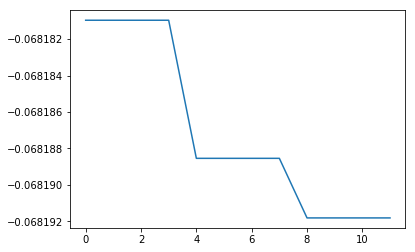

In [20]:
x = lgbm_df.index.values
y = lgbm_df['mean_test_score'].values
plt.plot(x,y)

In [21]:
lgbm_df.iloc[0]

mean_fit_time                                                            6443.29
mean_score_time                                                          1.53993
mean_test_score                                                        -0.068181
mean_train_score                                                      -0.0678177
param_bagging_fraction                                                       0.7
param_bagging_freq                                                            20
param_bagging_seed                                                             3
param_boosting_type                                                         gbdt
param_feature_fraction                                                       0.8
param_feature_fraction_seed                                                    2
param_learning_rate                                                       0.0021
param_max_bin                                                                  7
param_metric                